# Análisis y gráficas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### Obteniendo datos ya limpios 

In [2]:
DATA = pd.read_csv('New_Data.csv')
DATA_4m = pd.read_csv('New_Data_4m.csv') #Datos en intervalos de 4 meses
DATA_3m = pd.read_csv('New_Data_3m.csv') #Datos en intervalos de 3 meses
DATA_6m = pd.read_csv('New_Data_6m.csv') #Datos en intervalos de 6 meses

In [3]:
DATA_3m.tail()

,Trimestre,Dept,Resp,Nvi,Tipo
64766,2013-4,VICHADA,Guerrilla,1,Secuestro
64767,2013-4,VICHADA,Otros,4,Muerte
64768,2013-4,VICHADA,Otros,4,Lesion
64769,2013-4,VICHADA,Otros,4,Categoria Inexistente
64770,2018-3,VICHADA,A. Extranjero,3,Secuestro


In [4]:
DATA_6m.head()

,Semestre,Dept,Resp,Nvi,Tipo
0,2003-2,AMAZONAS,Guerrilla,1,Secuestro
1,2003-2,AMAZONAS,Guerrilla,1,Categoria Inexistente
2,2007-1,AMAZONAS,Otros,1,Lesion
3,2015-1,AMAZONAS,Estado,1,Lesion
4,2015-1,AMAZONAS,Estado,1,Amenaza


In [5]:
DATA_6m[9210:9220]

,Semestre,Dept,Resp,Nvi,Tipo
9210,2018-2,ANTIOQUIA,Paramilitares,0,Otros
9211,2018-2,ANTIOQUIA,Estado,0,Amenaza
9212,2018-2,ANTIOQUIA,Estado,0,Otros
9213,2019-1,ANTIOQUIA,Paramilitares,1,Amenaza
9214,2019-1,ANTIOQUIA,Paramilitares,1,Muerte
9215,2019-1,ANTIOQUIA,Otros,2,Lesion
9216,2019-1,ANTIOQUIA,Otros,2,Amenaza
9217,2019-1,ANTIOQUIA,Paramilitares,1,Amenaza
9218,2019-1,ANTIOQUIA,Paramilitares,1,Desplazamiento
9219,2019-1,ANTIOQUIA,Paramilitares,1,Muerte


__Conteo de porcentajes__

Tomaremos algunos datos de interes

In [6]:
(DATA_6m.groupby('Tipo').sum()/sum(DATA_6m.groupby('Tipo').sum()))*100

,Nvi
Tipo,
Amenaza,25.263501
Ataques,4.852248
Categoria Inexistente,4.134248
Desplazamiento,0.774852
Lesion,17.208360
Muerte,32.890013
Otros,0.611961
Secuestro,14.041240
Violencia Sexual,0.223576


In [7]:
(DATA_6m.groupby('Resp').sum()/sum(DATA_6m.groupby('Resp').sum()))*100

,Nvi
Resp,
A. Extranjero,0.113705
Empresas,0.020441
Estado,32.812720
G. Intolerancia,1.955975
Guerrilla,14.002913
Otros,17.071659
Paramilitares,34.022588


Datos para saber llamar en los DataFrame

In [8]:
DATA_3m.Resp.unique()

array(['Guerrilla', 'Otros', 'Estado', 'A. Extranjero', 'Paramilitares',
       'G. Intolerancia', 'Empresas'], dtype=object)

In [9]:
DATA_3m.Tipo.unique()

array(['Secuestro', 'Categoria Inexistente', 'Lesion', 'Amenaza',
       'Muerte', 'Ataques', 'Otros', 'Desplazamiento', 'Violencia Sexual'],
      dtype=object)

__Visualizando Generales__

## Numero de actos por responsable y por tipo

In [22]:
#Numero de actos por responsable
DATA_6m.groupby(['Resp']).sum()

,Nvi
Resp,
A. Extranjero,178
Empresas,32
Estado,51367
G. Intolerancia,3062
Guerrilla,21921
Otros,26725
Paramilitares,53261


In [11]:
#Numero de actos por tipo
DATA_6m.groupby(['Tipo']).sum()

,Nvi
Tipo,
Amenaza,39549
Ataques,7596
Categoria Inexistente,6472
Desplazamiento,1213
Lesion,26939
Muerte,51488
Otros,958
Secuestro,21981
Violencia Sexual,350


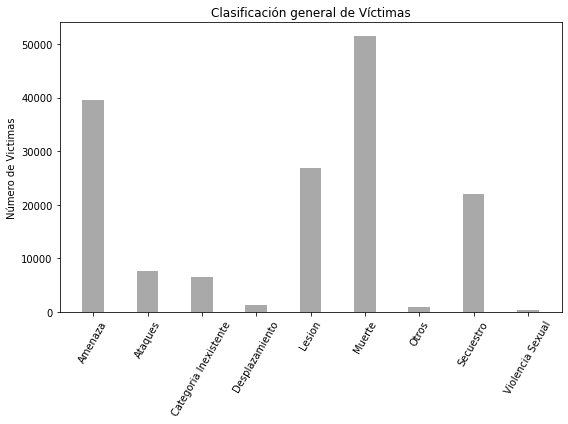

In [12]:
###==== Haciendo histogramas ====###
nTipo = range(0,len(DATA_6m['Tipo'].unique()))
Tip_Vic = sort(DATA_6m['Tipo'].unique())

plt.figure(figsize(8, 6))
plt.bar(nTipo, DATA_6m.groupby(['Tipo']).sum()['Nvi'], width=0.4, color='darkgray')
plt.xticks(nTipo, Tip_Vic, rotation=60, fontsize='medium')
plt.ylabel("Número de Victimas")
plt.title("Clasificación general de Víctimas")
plt.tight_layout()


plt.savefig("Clas_victimas.png")

plt.show()

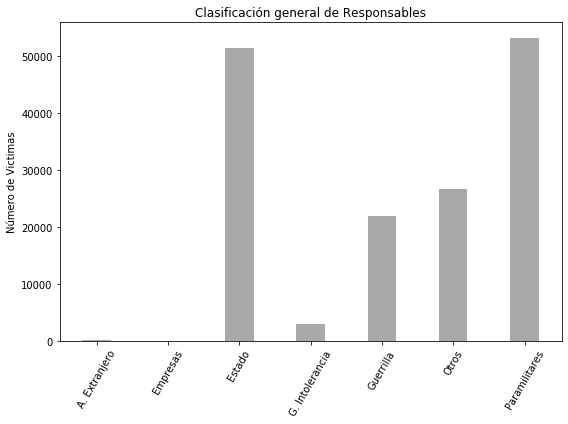

In [13]:
###==== Haciendo histogramas ==== 
nResp = range(0,len(DATA_6m['Resp'].unique()))
Vic_Resp = sort(DATA_6m['Resp'].unique())

plt.figure(figsize(8, 6))
plt.bar(nResp, DATA_6m.groupby(['Resp']).sum()['Nvi'], width=0.4, color='darkgray')
plt.xticks(nResp, Vic_Resp, rotation=60, fontsize='medium')
plt.ylabel("Número de Victimas")
plt.title("Clasificación general de Responsables")
plt.tight_layout()

plt.savefig("Clas_Resp.png")

plt.show()

### Haciendo primeros histogramas en el tiempo 

Definiendo las funciones que hacen los histogramas

In [14]:
#Función que separa un df con el responsable y el tipo que queramos:
def RespTipo(Resp,Tipo,df):
    ndf = df.copy()
    indexNames = ndf[ ndf['Resp'] != Resp ].index
    ndf.drop(indexNames , inplace=True)
    indexNames = ndf[ ndf['Tipo'] != Tipo ].index
    ndf.drop(indexNames , inplace=True)
    ndf = ndf.reset_index()
    return ndf

def histogramas(ndata,columna):#recibe la columna del dataframe
    index = range(0,len(ndata[columna].unique()))
    Labels = sort(ndata[columna].unique())
    
    plt.figure(figsize=(8, 6))
    plt.bar(index, ndata.groupby([columna]).sum()['Nvi'], width=0.4)
    plt.xticks(index, Labels, rotation=90, fontsize='small')
    plt.xlabel(columna)
    plt.ylabel("Número de Victimas")
    plt.tight_layout()
    plt.show()
    
###==== Función modificada para sacar datos ===== 
def RespTipo_mod(Resp,Tipo,df):
    ndf = df.copy()
    indexNames = ndf[ ndf['Resp'] != Resp ].index
    ndf.drop(indexNames , inplace=True)
    indexNames = ndf[ ndf['Tipo'] != Tipo ].index
    ndf.drop(indexNames , inplace=True)
    
    times = df.Semestre.unique()
    ndftimes = ndf.Semestre.unique()
    
    for kk in times:
        if kk in ndftimes:
            continue
        else:
            ndf = ndf.append(pd.Series([ kk, 'SL', Resp, 0, Tipo], index=ndf.columns ), ignore_index=True)
    
    ndf = ndf.reset_index()
    return ndf

In [15]:
###===== Definimos función para histograma conjunto ====== 
def histo_conj(dtf, tipoVict, columna, name):
    Est = RespTipo('Estado', tipoVict, dtf)
    Gue = RespTipo('Guerrilla', tipoVict, dtf)
    Par = RespTipo('Paramilitares', tipoVict, dtf)
    
    index = range(0,len(Gue[columna].unique()))
    Labels = sort(Gue[columna].unique())    
    
    x = np.arange(len(Labels))  # the label locations
    width = 0.5  # the width of the bars
    
    plt.figure(figsize=(8, 6))
    plt.bar(x - width/3, Gue.groupby([columna]).sum()['Nvi'], width, label='Guerrilla', color='c')
    plt.bar(x + width/3, Par.groupby([columna]).sum()['Nvi'], width, label='Paramilitares', color='darkgray')
    plt.bar(x, Est.groupby([columna]).sum()['Nvi'], width, label='Estado', color='m')
    
    plt.xticks(index, Labels, rotation=90, fontsize='small')
    plt.xlabel(columna)
    plt.ylabel('Número de victimas')
    plt.title('Evolución temporal de: {}'.format(tipoVict))
    plt.tight_layout()
    plt.legend()
    
    plt.savefig(name)
    
    plt.show()
    
    return True

__Evoluciones temporales__

Primero presentaremos los datos semestrales en las tipificaciones que más se repiten


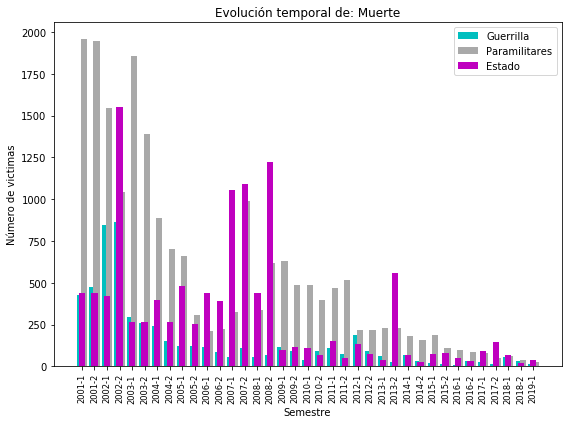

True

In [16]:
histo_conj(DATA_6m, 'Muerte', 'Semestre', "Evol_Muerte.png")

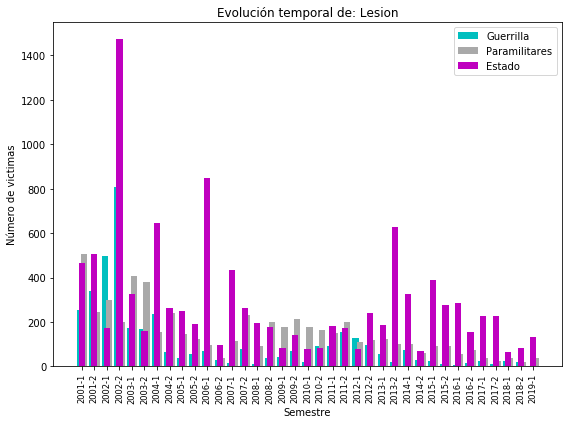

True

In [17]:
histo_conj(DATA_6m, 'Lesion', 'Semestre', "Evol_Lesion.png")

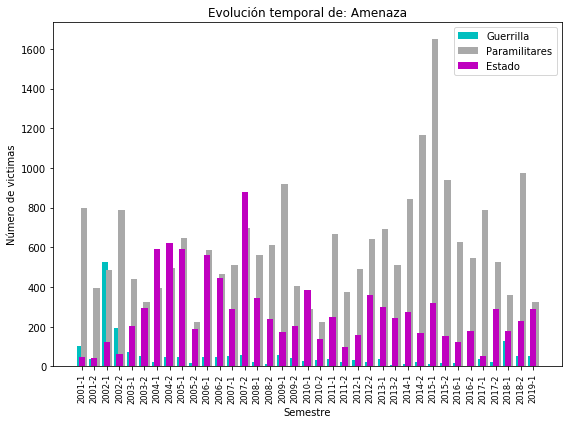

True

In [18]:
histo_conj(DATA_6m, 'Amenaza', 'Semestre', "Evol_Amenaza.png")

In [19]:
###===== Definimos función para histograma conjunto modificada ====== 
def histo_conj_mod(dtf, tipoVict, columna, name):
    Est = RespTipo_mod('Estado', tipoVict, dtf)
    Gue = RespTipo_mod('Guerrilla', tipoVict, dtf)
    Par = RespTipo_mod('Paramilitares', tipoVict, dtf)
    
    index = range(0,len(Gue[columna].unique()))
    Labels = sort(Gue[columna].unique())    
    
    x = np.arange(len(Labels))  # the label locations
    width = 0.5  # the width of the bars
    
    plt.figure(figsize=(8, 6))
    plt.bar(x - width/3, Gue.groupby([columna]).sum()['Nvi'], width, label='Guerrilla', color='c')
    plt.bar(x + width/3, Par.groupby([columna]).sum()['Nvi'], width, label='Paramilitares', color='darkgray')
    plt.bar(x, Est.groupby([columna]).sum()['Nvi'], width, label='Estado', color='m')
    
    plt.xticks(index, Labels, rotation=90, fontsize='small')
    plt.xlabel(columna)
    plt.ylabel('Número de victimas')
    plt.title('Evolución temporal de: {}'.format(tipoVict))
    plt.tight_layout()
    plt.legend()
    
    plt.savefig(name)
    
    plt.show()
    
    return True

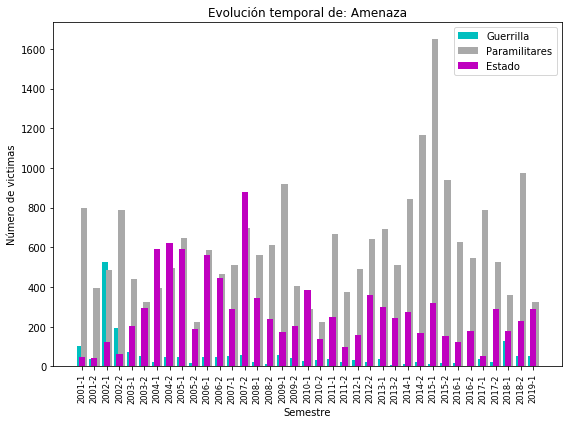

True

In [26]:
histo_conj_mod(DATA_6m, 'Amenaza', 'Semestre','Evol_Amenaza.png')

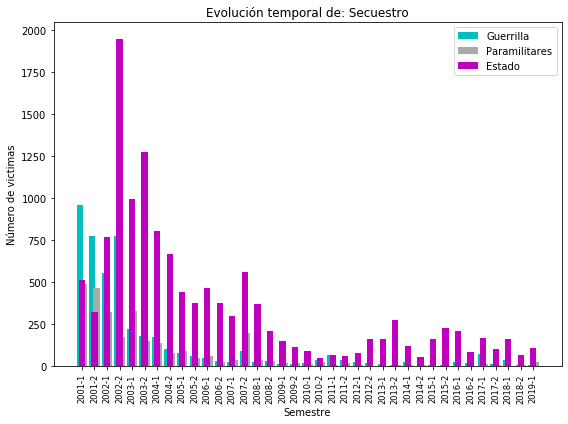

True

In [27]:
histo_conj_mod(DATA_6m, 'Secuestro', 'Semestre', "Evol_Secuestro.png")

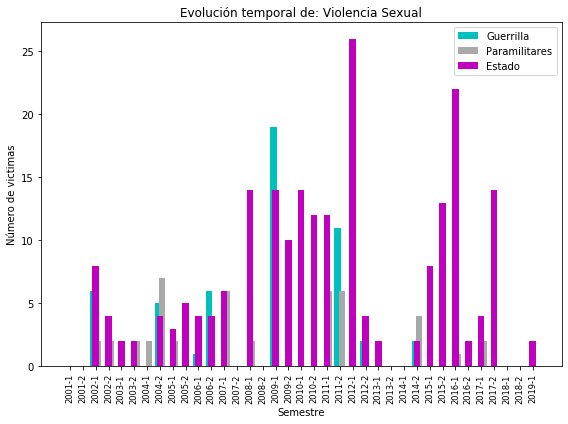

True

In [28]:
histo_conj_mod(DATA_6m, 'Violencia Sexual', 'Semestre', "Evol_VS.png")

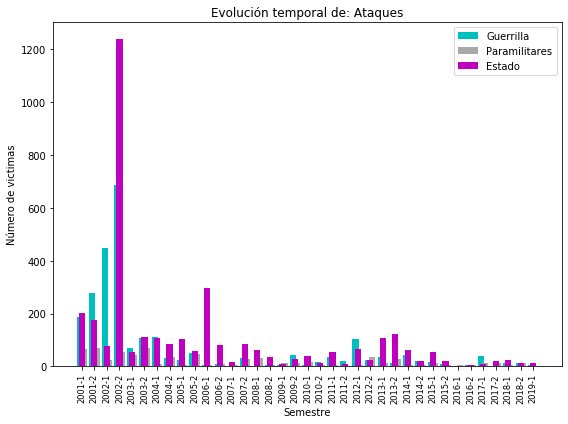

True

In [29]:
histo_conj_mod(DATA_6m, 'Ataques', 'Semestre', "Evol_Ataques.png")

### Diagramas de correlación 

Se propone una forma inicial para visualizar si existe alguna correlación entre los diferentes tipos de responsables 

In [30]:
###==== Definiendo función para gráficas de correlación ===== 
def corr_hist(dtf, resp1, resp2, tipoVict, columna, name):
    
    ndata1 = RespTipo_mod(resp1, tipoVict, dtf)
    ndata2 = RespTipo_mod(resp2, tipoVict, dtf)
    
    index = range(0,len(ndata1[columna].unique()))
    Labels = sort(ndata1[columna].unique())
    bins = ndata1.groupby([columna]).sum()['Nvi'] / ndata2.groupby([columna]).sum()['Nvi']
    medias = ndata1.groupby([columna]).mean()['Nvi'] / ndata2.groupby([columna]).mean()['Nvi']
    linea = bins.mean()
    
    plt.figure(figsize=(8, 6))
    plt.bar(index, bins, width=0.4, color='darkgray')
    plt.plot(medias,'ko')
    plt.hlines(linea,min(index),max(index), color='m')
    plt.xticks(index, Labels, rotation=90, fontsize='small')
    plt.tight_layout()
    plt.title('Posible relación entre {} y {} \n Tipo: {}'.format(resp1, resp2, tipoVict))
    plt.ylabel('Correlación')
    plt.xlabel(columna)
    
    #plt.savefig(name)
    
    plt.show()
    
    return True

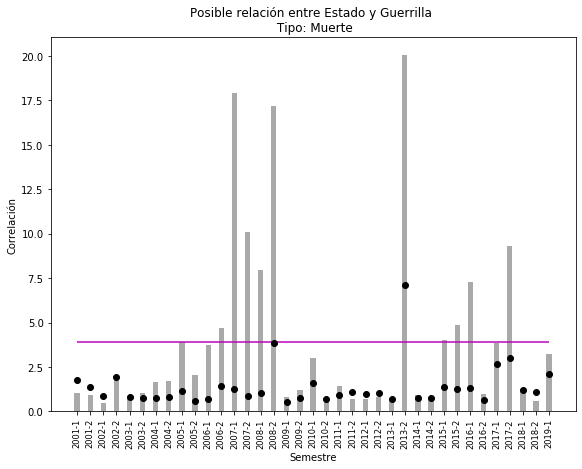

True

In [31]:
corr_hist(DATA_6m, 'Estado', 'Guerrilla',  'Muerte', 'Semestre', "Corr_EyG_M.png")

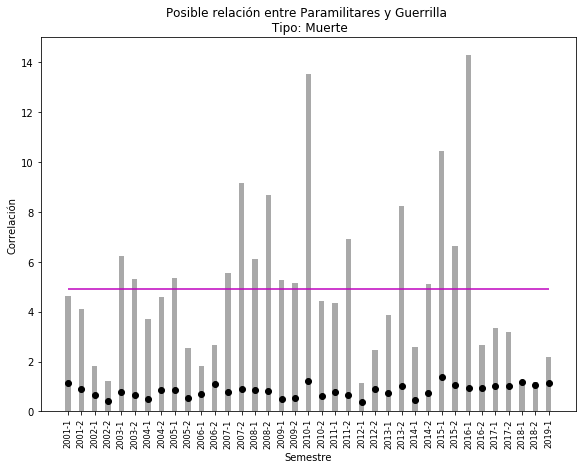

True

In [32]:
corr_hist(DATA_6m, 'Paramilitares', 'Guerrilla', 'Muerte', 'Semestre', "Corr_PyG_M.png")

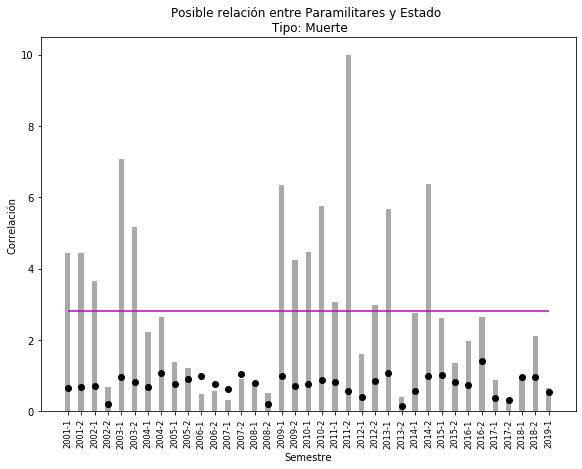

True

In [33]:
corr_hist(DATA_6m, 'Paramilitares', 'Estado', 'Muerte', 'Semestre', "Corr_PyE_M.png")

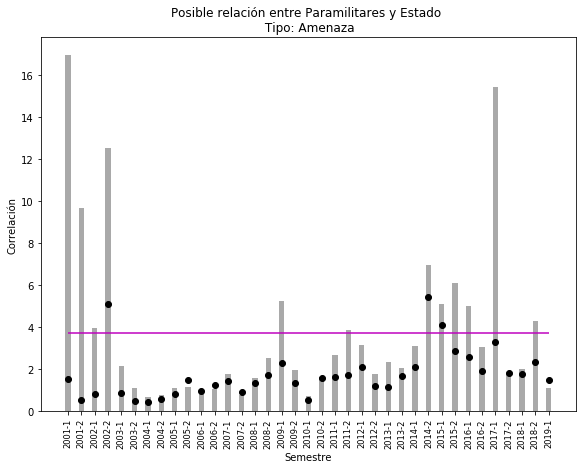

True

In [34]:
corr_hist(DATA_6m, 'Paramilitares', 'Estado',  'Amenaza', 'Semestre', "Corr_PyE_A.png")

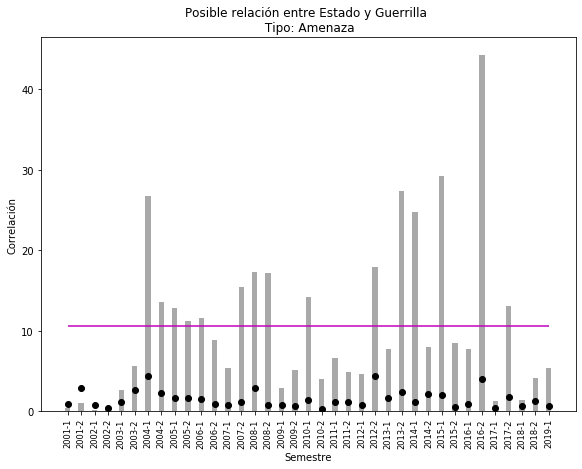

True

In [35]:
corr_hist(DATA_6m, 'Estado', 'Guerrilla',  'Amenaza', 'Semestre', "Corr_EyG_A.png")

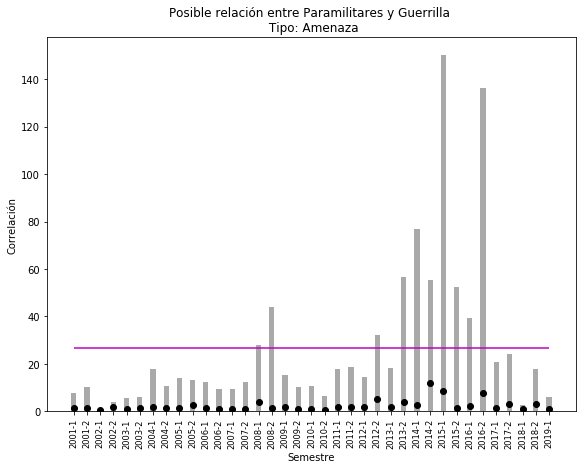

True

In [36]:
corr_hist(DATA_6m, 'Paramilitares', 'Guerrilla',  'Amenaza', 'Semestre', "Corr_PyG_A.png")

In [37]:
###==== Definiendo función para gráficas de correlación modificada ===== 
def corr_hist_mod(dtf, resp1, resp2, tipoVict, columna):
    
    ndata1 = RespTipo_mod(resp1, tipoVict, dtf)
    ndata2 = RespTipo_mod(resp2, tipoVict, dtf)
    
    index = range(0,len(ndata1[columna].unique()))
    Labels = sort(ndata1[columna].unique())
    bins1 = ndata1.groupby([columna]).sum()['Nvi'] / ndata2.groupby([columna]).sum()['Nvi']
    bins2 = ndata2.groupby([columna]).sum()['Nvi'] / ndata1.groupby([columna]).sum()['Nvi']
    medias1 = ndata1.groupby([columna]).mean()['Nvi'] / ndata2.groupby([columna]).mean()['Nvi']
    medias2 = ndata2.groupby([columna]).mean()['Nvi'] / ndata1.groupby([columna]).mean()['Nvi']
    linea1 = bins1.mean(); linea2 = bins2.mean()
    
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
    
    ax1.bar(index, bins1, width=0.4, color='darkgray'); ax2.bar(index, bins2, width=0.4, color='darkgray')
    ax1.plot(medias1,'ko'); ax2.plot(medias2,'ko')
    ax1.hlines(linea1,min(index),max(index), color='m'); ax2.hlines(linea2,min(index),max(index), color='m')
    ax1.set_xticks(index, Labels, rotation=90, fontsize='small'); ax2.xticks(index, Labels, rotation=90, fontsize='small')
    plt.tight_layout()
    ax1.title('Posible relación entre {} y {}'.format(resp1, resp2)); ax2.title('Posible relación entre {} y {}'.format(resp2, resp1))
    ax1.set_ylabel('Correlación'); ax2.set_ylabel('Correlación')
    ax1.set_xlabel(columna); ax2.set_xlabel(columna)
    plt.show()
    
    return True

### Fechas Elecciones 

se pondrá el trimestre en el cual se efectuaron las votaciones

- Locales: 

2000-4, 2003-4, 2007-4, 2011-4, 2015-4

- Nacionales:

Congreso:
2002-2, 2006-2, 2010-2, 2014-1, 2018-1

Presidente:
2002-2, 2006-2, 2010-2, 2014-2, 2018-2

Referendos:
2003-4

Consultas de partidos:
2006-1, 2007-1, 2008-4, 2009-3, 2010-1, 2011-3, 2012-3

Consultas populares:
2007-3

Plebiscito:
2016-4

__Otras fechas importantes__

- Inicio de los dialogos del acuerdo de paz: 2012-3
- Clausura de los dialogos: 2016-3
- Firma de los acuerdos: 2016-4
- Se objeta la JEP: 2019-1